# UK Car Accidents Analysis

Load libraries and data csv's

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
accidents = pd.read_csv('./data/Accidents0515.csv')

First glance at data

In [4]:
#accidents.head()
#accidents.info()
accidents.shape

(1780653, 32)

Drop superfluous columns

These variables can be revisited later, i.e longitude and latitude can be examined in geospatial analysis, date can be used in a time series. They will be dropped for the initial analysis

In [5]:
acc = accidents.drop(['Police_Force','Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Date', 
                      'Local_Authority_(District)','Local_Authority_(Highway)', '1st_Road_Number', '2nd_Road_Number',
                      'LSOA_of_Accident_Location'], axis=1, inplace=False,)
#acc.set_index('Accident_Index', inplace = True)
acc.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,...,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,200501BS00001,2,1,1,3,17:42,3,6,30,0,...,-1,0,1,1,2,2,0,0,1,1
1,200501BS00002,3,1,1,4,17:36,4,3,30,6,...,5,0,5,4,1,1,0,0,1,1
2,200501BS00003,3,2,1,5,00:15,5,6,30,0,...,-1,0,0,4,1,1,0,0,1,1
3,200501BS00004,3,1,1,6,10:35,3,6,30,0,...,-1,0,0,1,1,1,0,0,1,1
4,200501BS00005,3,1,1,2,21:13,6,6,30,0,...,-1,0,0,7,1,2,0,0,1,1


In [ ]:
acc.info()

#### Data Wrangling

In [45]:
acc.rename(columns={'Did_Police_Officer_Attend_Scene_of_Accident':'Police'}, inplace=True)

First replace the entries of Day_of_Week column to weekday name strings using a newly defined function

In [46]:
def weekdayconvert(code) :
    if code == 1:
        return 'Sunday'
    if code == 2:
        return 'Monday'
    if code == 3:
        return 'Tuesday'
    if code == 4:
        return 'Wednesday'
    if code == 5:
        return 'Thursday'
    if code == 6:
        return 'Friday'
    if code == 7:
        return 'Saturday'

Replace severity level codes with corresponding keywords

In [47]:
def severityconvert(code):
    if code == 1:
        return 'Fatal'
    if code == 2:
        return 'Serious'
    if code == 3:
        return 'Slight'

In [ ]:
def weatherconvert(code):
    if code == 1:
        return ''
    if code == 2:
        return ''
    if code == 3:
        return ''

In [ ]:
acc['Weather_Conditions'].unique()

In [58]:
acc.Day_of_Week = acc.Day_of_Week.apply(weekdayconvert)
acc.Accident_Severity = acc.Accident_Severity.apply(severityconvert)
#acc.Weather_Conditions = acc.Weather_Conditions.apply(weatherconvert)
acc.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Police,Hour,Minute,Rush_hour
0,200501BS00001,Serious,1,1,Tuesday,17:42,3,6,30,0,...,1,2,2,0,0,1,1,17.0,42.0,2
1,200501BS00002,Slight,1,1,Wednesday,17:36,4,3,30,6,...,4,1,1,0,0,1,1,17.0,36.0,2
2,200501BS00003,Slight,2,1,Thursday,00:15,5,6,30,0,...,4,1,1,0,0,1,1,0.0,15.0,2
3,200501BS00004,Slight,1,1,Friday,10:35,3,6,30,0,...,1,1,1,0,0,1,1,10.0,35.0,2
4,200501BS00005,Slight,1,1,Monday,21:13,6,6,30,0,...,7,1,2,0,0,1,1,21.0,13.0,2


Add a new column named 'Rush_hour' which consists of binary entries, where a value of 0 means 'not rush hour' and a value 1 means 'rush hour'.
The accident is considered to have taken place during rush hour if it took place on a weekday and between the times 7:00-10:00 or 16:00-18:30

In [57]:
acc['Rush_hour'] = 2 # by the end of the loop the column should only have values of 0 or 1. if any 2's remain this will allow us to identify rows which havent been converted properly

In [96]:
acc['Hour'] = pd.to_datetime(acc['Time']).dt.hour
acc['Minute'] = pd.to_datetime(acc['Time']).dt.minute
acc.head()

/var/folders/22/h8x7wz317lj7z2vwxwxw6tv00000gn/T/ipykernel_4133/3069111553.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  acc['Hour'] = pd.to_datetime(acc['Time']).dt.hour
/var/folders/22/h8x7wz317lj7z2vwxwxw6tv00000gn/T/ipykernel_4133/3069111553.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  acc['Minute'] = pd.to_datetime(acc['Time']).dt.minute


,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Police,Hour,Minute,Rush_hour
0,200501BS00001,Serious,1,1,Tuesday,17:42,3,6,30,0,...,1,2,2,0,0,1,1,17.0,42.0,2
1,200501BS00002,Slight,1,1,Wednesday,17:36,4,3,30,6,...,4,1,1,0,0,1,1,17.0,36.0,2
2,200501BS00003,Slight,2,1,Thursday,00:15,5,6,30,0,...,4,1,1,0,0,1,1,0.0,15.0,2
3,200501BS00004,Slight,1,1,Friday,10:35,3,6,30,0,...,1,1,1,0,0,1,1,10.0,35.0,2
4,200501BS00005,Slight,1,1,Monday,21:13,6,6,30,0,...,7,1,2,0,0,1,1,21.0,13.0,2


In [69]:
acctest.reset_index(inplace=True)

In [90]:
def rushconvert(i):
    if acctest.loc[i]['Day_of_Week'] == 'Saturday' or acctest.loc[i]['Day_of_Week'] == 'Sunday' :
        acctest.loc[i][['Rush_hour']] == 0

In [97]:
#acctest = acctest.apply(rushconvert, axis = 0)

In [89]:
acctest

,index,Day_of_Week,Time,Rush_hour
0,7,Friday,17:35,2
1,8,Saturday,22:43,2
2,9,Saturday,16:00,2
3,10,Sunday,00:42,2
4,11,Tuesday,20:48,2
5,12,Tuesday,12:55,2
6,13,Tuesday,05:01,2
7,14,Tuesday,11:15,2
8,15,Tuesday,10:50,2
9,16,Thursday,00:15,2


In [60]:
acc.loc[0, 'Day_of_Week'] == 'Tuesday'

True

In [ ]:
# def rushconvert(time):
#     day = pd.to_datetime(time).day_name()
#     hour = pd.to_datetime(time).hour
#     minute = pd.to_datetime(time).minute
    
#     if day == 'Saturday' or day == 'Sunday':
#         return 0

#     else:
#         if (hour == 7) | (hour == 8) | (hour == 9) :
#             return 1 # morning rush

#         if (hour == 16) | (hour == 17):
#             return 1 # evening rush

#         if (hour == 18) and (minute <= 30):
#             return 1 # evening rush

#         else:
#             return 0
        
# acc.Rush_hour = acc.Time.apply(rushconvert)


### Data aggregation & visualisation

In [98]:
weekdays = acc.groupby('Day_of_Week')[['Accident_Severity']].value_counts().reset_index()
weekdays.head(6)

,Day_of_Week,Accident_Severity,count
0,Friday,Slight,249148
1,Friday,Serious,38701
2,Friday,Fatal,3510
3,Monday,Slight,217592
4,Monday,Serious,32729
5,Monday,Fatal,2949


''

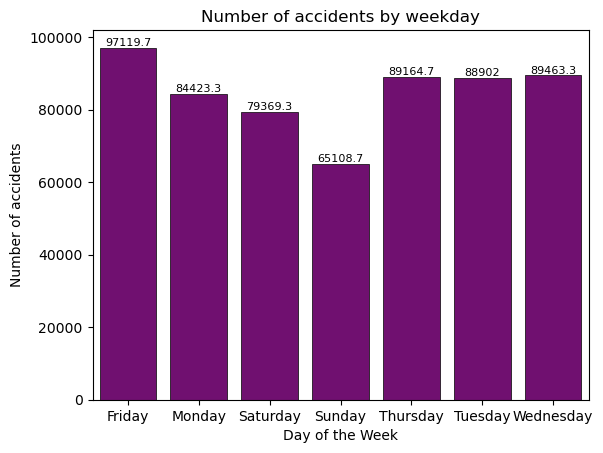

In [99]:
fig = sns.barplot(data = weekdays, x = 'Day_of_Week', y = 'count',
                  edgecolor = 'k', linewidth = 0.5, errorbar = None, color='purple')

fig.set(xlabel = 'Day of the Week', ylabel = 'Number of accidents', title = 'Number of accidents by weekday')

fig.bar_label(fig.containers[0], fontsize = 8)
;

''

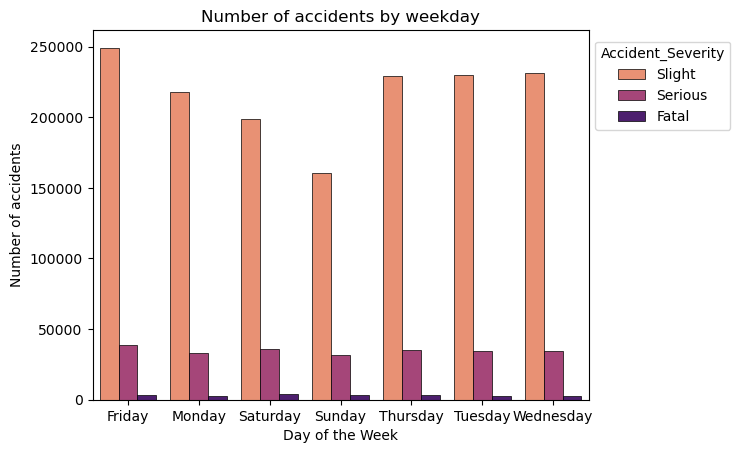

In [102]:
fig = sns.barplot(data = weekdays, x = "Day_of_Week", y = 'count', hue = 'Accident_Severity',
                  edgecolor = 'k', linewidth = 0.5, errorbar = None, palette='magma_r')

fig.set(xlabel = 'Day of the Week', ylabel = 'Number of accidents', title = 'Number of accidents by weekday')

sns.move_legend(fig, 'center right', bbox_to_anchor = (1.3, 0.85))
;

In [111]:
police = acc.groupby('Police')[['Accident_Severity']].value_counts().reset_index()
police

,Police,Accident_Severity,count
0,-1,Slight,224
1,-1,Serious,48
2,-1,Fatal,6
3,1,Slight,1196020
4,1,Serious,220191
5,1,Fatal,22675
6,2,Slight,315987
7,2,Serious,21647
8,2,Fatal,311
9,3,Slight,3344


''

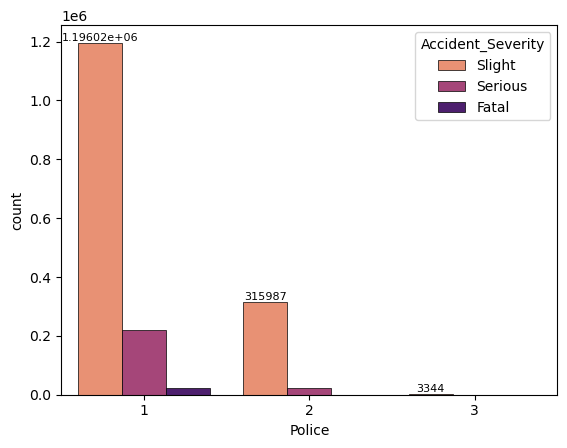

In [112]:
fig = sns.barplot(data = police.loc[3:], x = 'Police', y = 'count', hue = 'Accident_Severity',
            edgecolor = 'k', linewidth = 0.5, errorbar = None, palette='magma_r')

fig.bar_label(fig.containers[0], fontsize = 8, )
;

In [117]:
longlat = accidents.loc[:,['Accident_Severity', 'Longitude', 'Latitude']]
longlat.Accident_Severity = longlat.Accident_Severity.apply(severityconvert)
longlat.head()

,Accident_Severity,Longitude,Latitude
0,Serious,-0.191170,51.489096
1,Slight,-0.211708,51.520075
2,Slight,-0.206458,51.525301
3,Slight,-0.173862,51.482442
4,Slight,-0.156618,51.495752


In [121]:
longlat[longlat['Accident_Severity'] != 'Slight'].head()

,Accident_Severity,Longitude,Latitude
0,Serious,-0.191170,51.489096
16,Serious,-0.205139,51.500191
19,Serious,-0.174925,51.495498
30,Serious,-0.215545,51.517796
52,Serious,-0.212653,51.521709


<Axes: xlabel='Longitude', ylabel='Latitude'>

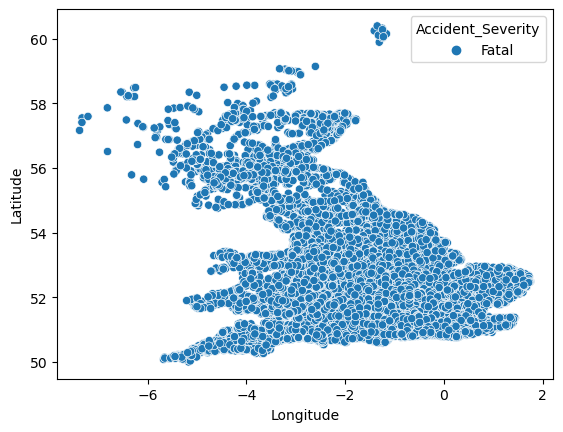

In [124]:
sns.scatterplot(data = longlat[longlat['Accident_Severity'] == 'Fatal'], x = 'Longitude', y = 'Latitude', hue = 'Accident_Severity')